In [2]:
from __future__ import division
from __future__ import print_function
from sklearn.ensemble import IsolationForest

import os
import sys
from time import time

# temporary solution for relative imports in case pyod is not installed
# if pyod is installed, no need to use the following line
sys.path.append(
    os.path.abspath(os.path.join(os.path.dirname("__file__"), '..')))

import numpy as np
from numpy import percentile
from sklearn.metrics import average_precision_score
import scipy.io
import matplotlib.pyplot as plt

In [3]:
# Define the number of inliers and outliers
n_samples = 256
outliers_fraction = 0.25
clusters_separation = [0]

# Compare given detectors under given settings
# Initialize the data
xx, yy = np.meshgrid(np.linspace(-7, 7, 100), np.linspace(-7, 7, 100))
n_inliers = int((1. - outliers_fraction) * n_samples)
n_outliers = int(outliers_fraction * n_samples)
ground_truth = np.zeros(n_samples, dtype=int)
ground_truth[-n_outliers:] = 1

In [4]:
random_state = np.random.RandomState(42)
# Define nine outlier detection tools to be compared
classifiers = {
    'Isolation Forest': IsolationForest(contamination=outliers_fraction,
                                random_state=random_state)
}

{'whiskers': [<matplotlib.lines.Line2D at 0x249785311c0>,
 'caps': [<matplotlib.lines.Line2D at 0x24978531820>,
 'boxes': [<matplotlib.lines.Line2D at 0x24978516eb0>],
 'medians': [<matplotlib.lines.Line2D at 0x24978531d00>],
 'fliers': [<matplotlib.lines.Line2D at 0x24978531fd0>],
 'means': []}

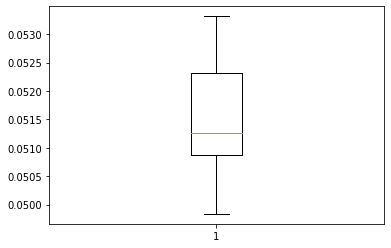

In [5]:
# Fit the models with the generated data and 
# compare model performances
for i, offset in enumerate(clusters_separation):
    np.random.seed(42)
    # Data generation
    #X1 = 0.3 * np.random.randn(n_inliers // 2, 2) - offset
    #X2 = 0.3 * np.random.randn(n_inliers // 2, 2) + offset
    #X = np.r_[X1, X2]
    # Add outliers
    #X = np.r_[X, np.random.uniform(low=-6, high=6, size=(n_outliers, 2))]
    data = scipy.io.loadmat('C:\\Users\\anton\\OneDrive\\Skrivbord\\Thesis_Code\\IsolationForestTinyML\\DatSets\\wine.mat',
                        squeeze_me=False)

    enlist = list(data.items())
    X = np.array(enlist, dtype=object)
    X = np.delete(X, 0, 0)
    X = np.delete(X, 0, 0)
    X = np.delete(X, 0, 0)
    X = np.delete(X, 0, 1)

    y_true = np.empty([1,0], dtype=int)

    #print(X[1][0][0])
    k = 0
    while k < len(X[1][0]):
        y_true = np.append(y_true, int(X[1][0][k]))
        k += 1

    X = X[0][0]
    # Fit the model
    #plt.figure(figsize=(15, 12))
    for i, (clf_name, clf) in enumerate(classifiers.items()):
        #print(i + 1, 'fitting', clf_name)
        # fit the data and tag outliers
        p = 0
        aps = []
        while p < 10:
            clf.fit(X)
            #WARNING put +1
            scores_pred = clf.decision_function(X) * 1 
            threshold = percentile(scores_pred, 100 * outliers_fraction)
            y_pred = clf.predict(X) * -1
            y_pred = (y_pred + 1) / 2
            aps.append(average_precision_score(y_true, scores_pred))
            p += 1
        #n_errors = (y_pred != ground_truth).sum()
        # plot the levels lines and the points
        #WARNING +1
        #Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * 1
        #Z = Z.reshape(xx.shape)
        #plt.figure(figsize=[10,10])
        #subplot = plt.subplot(2, 2, 1)
        #subplot.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),
        #                 cmap=plt.cm.Blues_r)
        #a = subplot.contour(xx, yy, Z, levels=[-threshold],
        #                    linewidths=2, colors='red')
        #subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()],
        #                 colors='orange')
        #b = subplot.scatter(X[:-n_outliers, 0], X[:-n_outliers, 1], c='white',
        #                    s=20, edgecolor='k')
        #c = subplot.scatter(X[-n_outliers:, 0], X[-n_outliers:, 1], c='black',
        #                    s=20, edgecolor='k')
        #subplot.axis('tight')
        #subplot.legend(
         #   [a.collections[0], b, c],
        #    ['learned decision function', 'true inliers', 'true outliers'],
          #  prop=matplotlib.font_manager.FontProperties(size=10),
          #  loc='lower right')
        #subplot.set_xlabel("%d. %s (errors: %d)" % (i + 1, clf_name, n_errors))
        #subplot.set_xlim((-7, 7))
        #subplot.set_ylim((-7, 7))
    #plt.subplots_adjust(0.04, 0.1, 0.96, 0.94, 0.1, 0.26)
    #plt.suptitle("Outlier detection")
#plt.show()
plt.boxplot(aps)

In [6]:

clf.estimators_[0].tree_.children_left

array([  1,   2,   3,   4,   5,  -1,   7,  -1,  -1,  10,  -1,  12,  13,
        14,  -1,  -1,  -1,  -1,  19,  20,  21,  -1,  -1,  -1,  -1,  26,
        27,  28,  29,  30,  31,  -1,  -1,  34,  -1,  -1,  37,  38,  -1,
        -1,  41,  -1,  -1,  44,  45,  46,  -1,  -1,  49,  -1,  -1,  52,
        -1,  54,  -1,  -1,  57,  -1,  59,  -1,  -1,  62,  63,  64,  65,
        -1,  67,  -1,  -1,  70,  71,  -1,  -1,  -1,  -1,  -1,  77,  78,
        79,  80,  81,  -1,  83,  84,  -1,  -1,  -1,  88,  89,  -1,  -1,
        92,  93,  -1,  -1,  96,  -1,  -1,  99, 100,  -1,  -1, 103,  -1,
       105, 106,  -1,  -1,  -1, 110, 111, 112,  -1,  -1,  -1, 116, 117,
        -1, 119,  -1,  -1,  -1, 123, 124, 125, 126, 127, 128,  -1,  -1,
        -1, 132, 133,  -1,  -1, 136,  -1,  -1, 139, 140,  -1, 142,  -1,
        -1,  -1, 146, 147, 148,  -1,  -1, 151, 152,  -1,  -1, 155,  -1,
        -1,  -1, 159, 160,  -1, 162, 163, 164,  -1,  -1,  -1, 168, 169,
        -1,  -1, 172,  -1,  -1, 175,  -1,  -1], dtype=int64)

In [7]:

len(clf.estimators_[0].tree_.children_right)

177

In [8]:
clf.estimators_[0].tree_.feature

array([ 7,  1,  5, 10,  6, -2,  6, -2, -2,  6, -2,  5, 12,  8, -2, -2, -2,
       -2,  4,  9,  6, -2, -2, -2, -2,  2,  8,  3,  1,  9,  6, -2, -2,  4,
       -2, -2,  6,  1, -2, -2,  6, -2, -2, 11,  2,  4, -2, -2,  3, -2, -2,
        1, -2, 11, -2, -2,  1, -2,  9, -2, -2,  2, 11,  5,  7, -2,  2, -2,
       -2,  4,  9, -2, -2, -2, -2, -2, 11,  7,  9,  9, 12, -2,  2, 12, -2,
       -2, -2,  0,  8, -2, -2, 10,  0, -2, -2,  2, -2, -2,  0,  1, -2, -2,
        7, -2,  6, 12, -2, -2, -2,  7,  8,  7, -2, -2, -2, 10,  9, -2, 10,
       -2, -2, -2, 10, 11, 10, 10,  6,  6, -2, -2, -2,  0,  6, -2, -2, 12,
       -2, -2,  0,  8, -2, 11, -2, -2, -2,  1,  5, 12, -2, -2, 11,  1, -2,
       -2,  6, -2, -2, -2,  3,  0, -2,  1,  3,  4, -2, -2, -2,  4,  5, -2,
       -2,  3, -2, -2,  5, -2, -2], dtype=int64)

In [9]:
len(clf.estimators_[0].tree_.threshold )

177

In [10]:
# Fit the models with the generated data and 
# compare model performances
for i, offset in enumerate(clusters_separation):
    np.random.seed(42)
    # Data generation
    #X1 = 0.3 * np.random.randn(n_inliers // 2, 2) - offset
    #X2 = 0.3 * np.random.randn(n_inliers // 2, 2) + offset
    #X = np.r_[X1, X2]
    # Add outliers
    #X = np.r_[X, np.random.uniform(low=-6, high=6, size=(n_outliers, 2))]
    data = scipy.io.loadmat('C:\\Users\\anton\\OneDrive\\Skrivbord\\Thesis_Code\\IsolationForestTinyML\\DatSets\\wine.mat',
                        squeeze_me=False)

    enlist = list(data.items())
    X = np.array(enlist, dtype=object)
    X = np.delete(X, 0, 0)
    X = np.delete(X, 0, 0)
    X = np.delete(X, 0, 0)
    X = np.delete(X, 0, 1)

    y_true = np.empty([1,0], dtype=int)

    #print(X[1][0][0])
    k = 0
    while k < len(X[1][0]):
        y_true = np.append(y_true, int(X[1][0][k]))
        k += 1

    X = X[0][0]
    # Fit the model
    #plt.figure(figsize=(15, 12))
    for i, (clf_name, clf) in enumerate(classifiers.items()):
        #print(i + 1, 'fitting', clf_name)
        # fit the data and tag outliers
        p = 0
        aps = []
        while p < 10:
            clf.fit(X)
            #WARNING put +1
            scores_pred = clf.decision_function(X) * 1 
            threshold = percentile(scores_pred, 100 * outliers_fraction)
            y_pred = clf.predict(X) * -1
            y_pred = (y_pred + 1) / 2
            aps.append(average_precision_score(y_true, scores_pred))
            p += 1
    
    from sklearn.preprocessing import MinMaxScaler
    
    scaler = MinMaxScaler()

    scaler.fit(X)

    max = scaler.data_max_
    min = scaler.data_min_

    norm_data = scaler.transform(X)

    print(len(norm_data))


    



129


In [20]:
file = open("save_vectors.ino", "w")

file.write("#include <vector>\n")
file.write("using namespace std;\n\n")
file.write("struct Tree{\n")
file.write("    int child_id_left, child_id_right, feature, n_samples;\n")
file.write("    float threshold;\n")
file.write("};\n\n")

file.write("vector<vector<Tree>> iForest;\n")
m = 0
while m < clf.n_estimators:
    file.write("std::vector<Tree> iTree" + str(m + 1) + ";\n")
    m += 1
file.write("\n")

f = 0
file.write("void setup() {\n")
file.write("    Serial.begin(9600);\n")
while f < clf.n_estimators:
    j = 0
    while j < len(clf.estimators_[f].tree_.feature):
        temp_child_l = clf.estimators_[f].tree_.children_left[j]
        if clf.estimators_[f].tree_.children_left[j] == -1:
            temp_child_l = 0

        temp_child_r = clf.estimators_[f].tree_.children_right[j]
        if temp_child_r == clf.estimators_[f].tree_.children_right[j] == -1:
            temp_child_r = 0

        temp_feature = clf.estimators_[f].tree_.feature[j]
        temp_threshold = clf.estimators_[f].tree_.threshold[j]
        temps_values = clf.estimators_[f].tree_.n_node_samples[j]

        file.write("    iTree" + str(f + 1) + ".push_back({"  
                                                            + str(temp_child_l) + ", "
                                                            + str(temp_child_r) + ", "
                                                            + str(temp_feature) + ", "
                                                            + str(temps_values) + ", "
                                                            + str(temp_threshold) + 
                                                        "});\n")

        j += 1

    file.write("    iForest.push_back(iTree" + str(f + 1) + ");\n\n")
    f += 1

rows = f*j
memory_per_vector = 8
allocated_memory = rows * memory_per_vector
file.write("}\n")
file.write("void loop() {\n")
file.write("}")




1

In [61]:



#open file
file = open('data.txt' , 'w')

s = 0
while s < clf.n_estimators:

    new_arr = np.delete(clf.estimators_[s].tree_.threshold, np.where(clf.estimators_[s].tree_.threshold == -2))
    scale = (max(new_arr)-min(new_arr))/ 255

    i = 0
    while i < len(clf.estimators_[s].tree_.threshold):

        if int(clf.estimators_[s].tree_.threshold[i]) != -2:
            quant = round(clf.estimators_[s].tree_.threshold[i]/scale - min(new_arr)) #Correct formula?
            clf.estimators_[s].tree_.threshold[i] = quant
        else:
            clf.estimators_[s].tree_.threshold[i] = clf.estimators_[s].tree_.threshold[i]
            
        i += 1
    file.write(str(s + 1))
    d = 0
    while d < len(clf.estimators_[s].tree_.feature):
        file.write(" " + str(clf.estimators_[s].tree_.children_left[d]))
        file.write(" " + str(clf.estimators_[s].tree_.children_right[d]))
        file.write(" " + str(clf.estimators_[s].tree_.feature[d]))
        file.write(" " + str(int(clf.estimators_[s].tree_.threshold[d])))
        file.write(" " + str(clf.estimators_[s].tree_.n_node_samples[d]))
        d += 1
    
    file.write("\n")
    s += 1

TypeError: 'numpy.ndarray' object is not callable